<a href="https://colab.research.google.com/github/on-kulyashov/Code-for-NMR-course/blob/main/Wigner_Dyson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt

pauli = np.array([ [[0,1],[1,0]], [[0,-1j],[1j,0]], [[1,0],[0,-1]] ]) / 2
dbl_pauli = np.array([np.kron(a,a) for a in pauli])

bin_num = 10
length = 8
trials = 1
# hamiltonian construction
def Hamiltonian(hz, N):
    H = np.zeros(2**N)
    H = H + np.kron(np.kron(pauli[2], np.eye(2**(N-2))), pauli[2])
    H = H + np.kron(np.kron(pauli[1], np.eye(2**(N-2))), pauli[1])
    H = H + np.kron(np.kron(pauli[0], np.eye(2**(N-2))), pauli[0])
    for i in range(N-1):
        H = H + np.kron(np.kron(np.eye(2**i), dbl_pauli[2]), np.eye(2**(N-2-i)))
        H = H + np.kron(np.kron(np.eye(2**i), dbl_pauli[1]), np.eye(2**(N-2-i)))
        H = H + np.kron(np.kron(np.eye(2**i), dbl_pauli[0]), np.eye(2**(N-2-i)))
    for i in range(N):
        H = H + hz[i]*np.kron(np.kron(np.eye(2**i), pauli[2]), np.eye(2**(N-1-i)))
    return np.real_if_close(H)

# stats collection
def stat(disorder, length, trials):
    hz = np.random.uniform(-disorder, disorder, length)
    H = Hamiltonian(hz, length)
    H, V = np.linalg.eig(H)
    E = np.real_if_close(np.sort(H))
    s = E[1:] - E[:-1]
    r = []
    kl_div = []
    for i in range(trials):
        r.extend([min(s[j],s[j+1]) / max(s[j], s[j+1]) for j in range(len(s) - 1)])
        kl_div.extend([entropy(abs(V[j])**2, abs(V[j+1])**2)  for j in range(len(E) - 1)])
    r_mean = np.mean(r)
    kl_div_mean = np.mean(kl_div)
    p_r = np.histogram(r, bins=bin_num, density=True)
    return (r_mean, p_r, kl_div_mean)


# plotting
disorder = np.linspace(1, 10, num=10)
stats = [stat(dis, length, trials) for dis in disorder]
r_mean_array = []
kl_div_mean_array = []
p_r_array = []
for dis in disorder:
    stats = stat(dis, length, trials)
    r_mean_array.append(stats[0])
    kl_div_mean_array.append(stats[2])
    p_r_array.append(stats[1])

ValueError: ignored

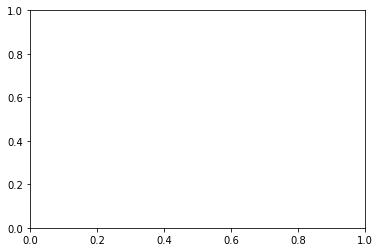

In [27]:
leg = []
for p_r_ar in p_r_array:
    plt.plot(p_r_ar[1], p_r_ar[0], 'r-', linewidth=2.0)
    leg.append("H = {}".format(dis))
plt.xlabel("Level difference ratio")
plt.ylabel("Probability density")
plt.legend(leg)
plt.grid()
plt.show()

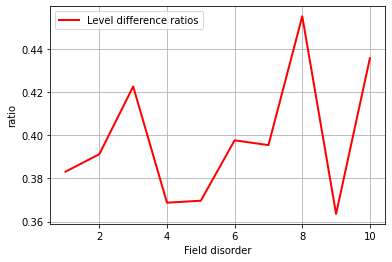

In [18]:
plt.plot(disorder, r_mean_array, 'r-', linewidth=2.0)
plt.xlabel("Field disorder")
plt.ylabel("Level difference ratio")
plt.legend(["Level difference ratios"])
plt.grid()
plt.show()

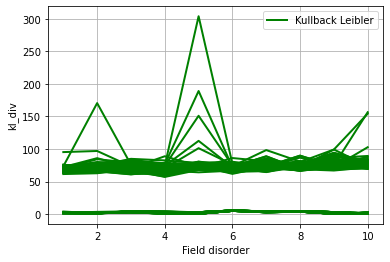

In [19]:
plt.plot(disorder, kl_div_mean_array, 'g-', linewidth=2.0)
plt.xlabel("Field disorder")
plt.ylabel("kl_div")
plt.legend(["Kullback Leibler"])
plt.grid()
plt.show()